In [2]:
import sklearn
from sklearn import tree
import pandas as pd
%matplotlib inline

In [3]:
clf=tree.DecisionTreeClassifier(max_depth=3,max_features=10,criterion='entropy')

In [4]:
data=pd.read_csv("d:\\credit.csv")

In [5]:
def changeyes_no(x):
    if x=='yes':
        return 1
    elif x=='no':
        return 0

In [6]:
newdefault=data['default'].apply(changeyes_no)#目标值处理成数字

In [7]:
data.default=newdefault

In [8]:
train_data=data.iloc[:,:len(data.columns)-1]

In [9]:
train_label=data.iloc[:,-1]

In [10]:
train_data=pd.get_dummies(train_data)#特征处理，全部在转换为数字

In [11]:
treemodel=clf.fit(train_data,train_label)

In [12]:
pre_d=treemodel.predict(train_data)
treemodel.score(train_data,train_label)

0.71499999999999997

## sklearn实现决策树2

In [13]:
import graphviz

In [14]:
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=train_data.columns,class_names=['No','Yes'],filled=True)

In [16]:
graph=graphviz.Source(dot_data)

In [17]:
treemodel.feature_importances_

array([ 0.3425373 ,  0.27056172,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01643849,  0.        ,  0.        ,  0.        ,
        0.        ,  0.20997708,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.16048541,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

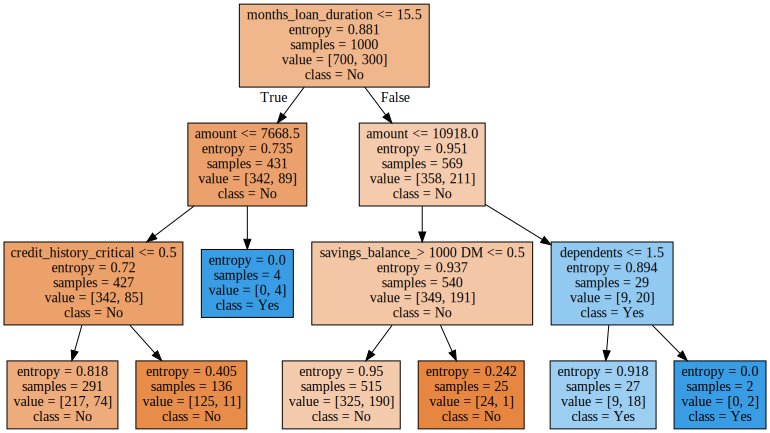

In [18]:
graph

## sklearn实现逻辑回归

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [20]:
llm=LogisticRegression()
llmmodel=llm.fit(train_data,train_label)
pre_train=llmmodel.predict(train_data)#预测数据
llmmodel.score(train_data,train_label)

0.76600000000000001

## sklearn 实现adaboost

In [21]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

In [24]:
clf=AdaBoostClassifier(n_estimators=10000)
clfmodel=clf.fit(train_data,train_label)
predy=clfmodel.predict(train_data)
clfmodel.score(train_data,train_label)

0.94599999999999995